This notebook is for EDA and modeling.

In [117]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Cleaning and Encoding Features

In [118]:
# Load the dataset
file_path = 'Patient_Keyboard_Data_Final.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())


   Unnamed: 0     Press   Release  Normed Pressure  Subject ID  Age (years)  \
0           0  16144290  16144380           0.5750           1           69   
1           1  16156363  16156478           0.3875           1           69   
2           2  16157517  16157625           0.5625           1           69   
3           3  16158215  16158330           0.5000           1           69   
4           4  16160974  16161072           0.6250           1           69   

  Gender       Education level  Years of smartphone usage Group  delta  \
0   Male  High school graduate                          3    PD     90   
1   Male  High school graduate                          3    PD    115   
2   Male  High school graduate                          3    PD    108   
3   Male  High school graduate                          3    PD    115   
4   Male  High school graduate                          3    PD     98   

   Wait_Time  
0        NaN  
1    11983.0  
2     1039.0  
3      590.0  
4    

In [119]:
data_cleaned = data.dropna()

# Verifying the removal
print(data_cleaned.isnull().sum())
data_cleaned = data_cleaned.drop(['Unnamed: 0'], axis=1)


Unnamed: 0                   0
Press                        0
Release                      0
Normed Pressure              0
Subject ID                   0
Age (years)                  0
Gender                       0
Education level              0
Years of smartphone usage    0
Group                        0
delta                        0
Wait_Time                    0
dtype: int64


In [120]:
encoded_data = pd.get_dummies(data_cleaned)

In [121]:
encoded_data=encoded_data.drop(columns=['Subject ID'])

# 3 Way Split - Training (60%), Validation (20%) and Testing (20%)

In [122]:

# Dropping the 'Unnamed: 0' column
data = data.drop(columns=['Unnamed: 0'])
data = data.drop(columns=['Subject ID'])
# Handling missing values in 'Wait_Time' by filling them with the median
data['Wait_Time'].fillna(data['Wait_Time'].median(), inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in ['Gender', 'Education level', 'Group']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting the data into features (X) and target (y)
X = data.drop('Group', axis=1)
y = data['Group']

# Splitting the dataset into training (60%), validation (20%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Displaying the first few rows of the processed data
X_train.head(), y_train.head()


(           Press    Release  Normed Pressure  Age (years)  Gender  \
 515     16771890   16771981           0.5125           69       1   
 23945   56863899   56863981           0.5125           62       0   
 10960   77778416   77778590           0.4125           52       0   
 14423  914902969  914903097           0.3875           61       1   
 18655    1821030    1821146           0.7625           54       0   
 
        Education level  Years of smartphone usage  delta  Wait_Time  
 515                  0                          3     91      384.0  
 23945                1                          2     82      250.0  
 10960                1                          3    174      524.0  
 14423                1                          1    128    10047.0  
 18655                1                          0    116      218.0  ,
 515      1
 23945    0
 10960    1
 14423    1
 18655    0
 Name: Group, dtype: int32)

# Train, and Evaluate Models on Validation Set

In [123]:

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm_model = SVC(probability=True)

# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)
acc_log_reg = accuracy_score(y_val, y_pred_log_reg)
report_log_reg = classification_report(y_val, y_pred_log_reg)

# Train and evaluate Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=10)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_val)
acc_decision_tree = accuracy_score(y_val, y_pred_decision_tree)
report_decision_tree = classification_report(y_val, y_pred_decision_tree)

#Train and evaluate Random Forest
random_forest = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5, min_samples_split=5, min_samples_leaf=10, max_features='sqrt')
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_val)
acc_random_forest = accuracy_score(y_val, y_pred_random_forest)
report_random_forest = classification_report(y_val, y_pred_random_forest)

# Train and evaluate SVM
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)
acc_svm = accuracy_score(y_val, y_pred_svm)
report_svm = classification_report(y_val, y_pred_svm)


c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
print(f"The accuracy for Logistic Regression is {acc_log_reg} \nThe accuracy for Decision Tree is {acc_decision_tree} \nThe accuracy for Random Forest is {acc_random_forest} \nThe accuracy for SVM is {acc_svm}")

The accuracy for Logistic Regression is 0.5307083647324793 
The accuracy for Decision Tree is 0.8415599095704597 
The accuracy for Random Forest is 0.9967972871137905 
The accuracy for SVM is 0.5719668425018839


# Confusion Matrices

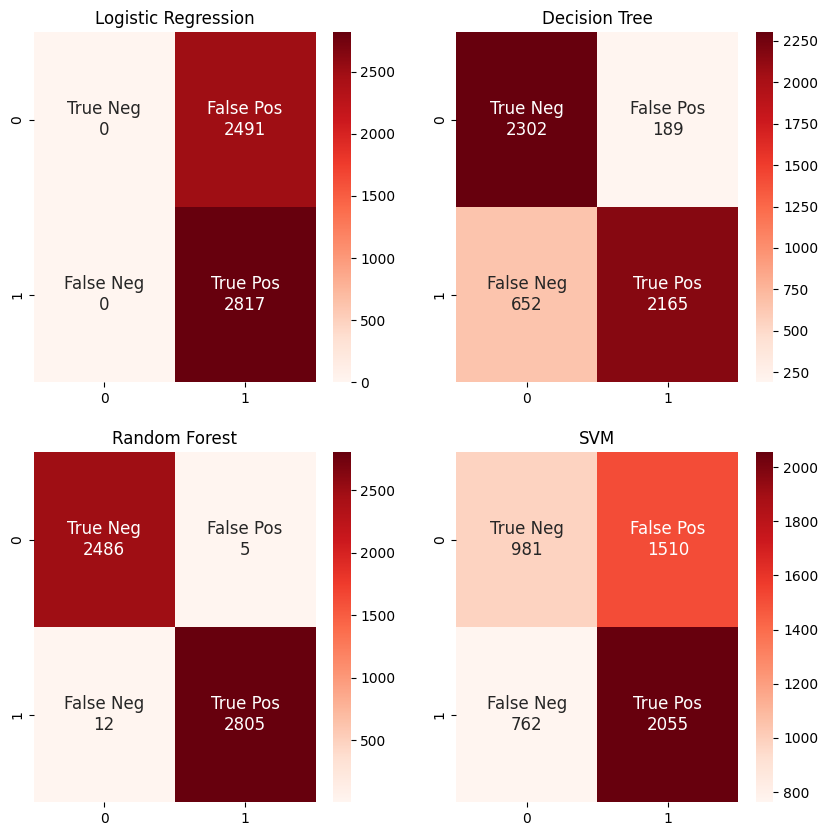

In [125]:
cf_matrix_lr = confusion_matrix(y_val, y_pred_log_reg)
cf_matrix_dt = confusion_matrix(y_val, y_pred_decision_tree)
cf_matrix_rf = confusion_matrix(y_val, y_pred_random_forest)
cf_matrix_svm = confusion_matrix(y_val, y_pred_svm)
# Labels for each quadrant of the confusion matrix
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
cf_matrices = [cf_matrix_lr, cf_matrix_dt, cf_matrix_rf, cf_matrix_svm]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

fig, axs = plt.subplots(2,2, figsize = (10,10))
axs = axs.flatten()

for cf_matrix, ax, model_name in zip(cf_matrices, axs, model_names):
    # Counts for each quadrant
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    # Labels and counts together
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
    # Reshape the labels to the size of the confusion matrix
    labels = np.asarray(labels).reshape(2,2)
    # Create the heatmap
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds', annot_kws={"size": 12}, ax=ax)
    ax.set_title(model_name)

# Correlation Matrix

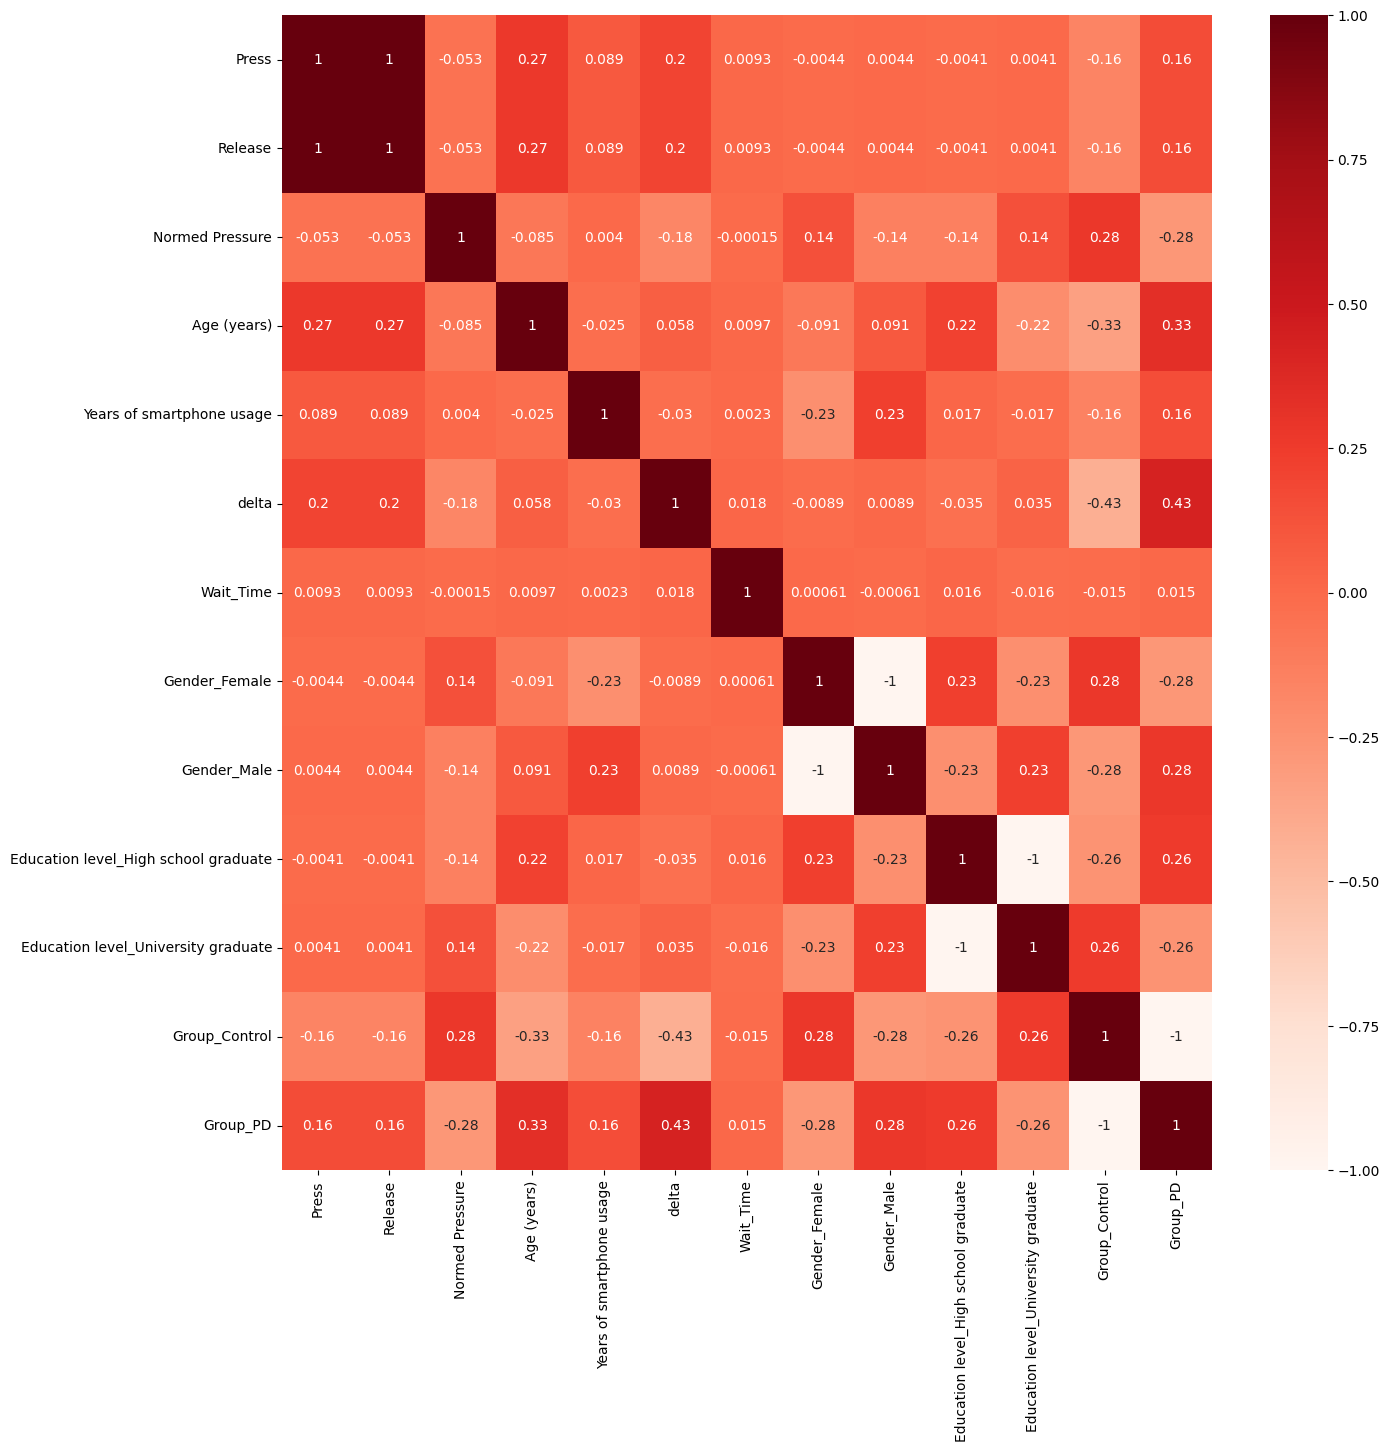

In [126]:
corr_matrix = encoded_data.corr()
target_corr = corr_matrix['Group_PD'].sort_values(ascending=False)
plt.figure(figsize = (15,15))
sns.heatmap(corr_matrix, cmap = 'Reds', annot=True)
plt.show()

# Predicting on Testing Set

In [129]:
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_val, y_pred_log_reg)

y_pred_decision_tree = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_val, y_pred_decision_tree)

y_pred_random_forest = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)

y_pred_svm = svm_model.predict(X_test)
acc_svm = accuracy_score(y_val, y_pred_svm)

print(f"The testing accuracy for Logistic Regression is {acc_log_reg} \nThe testing accuracy for Decision Tree is {acc_decision_tree} \nThe testing accuracy for Random Forest is {acc_random_forest} \nThe testing accuracy for SVM is {acc_svm}")

The testing accuracy for Logistic Regression is 0.5307083647324793 
The testing accuracy for Decision Tree is 0.4996232102486812 
The testing accuracy for Random Forest is 0.9966088922381311 
The testing accuracy for SVM is 0.5109269027882442


# AUC ROC

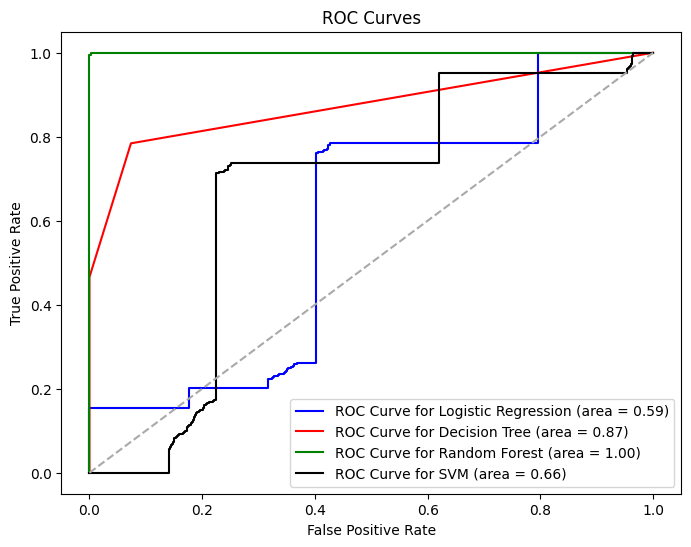

In [128]:
y_pred_lr_proba = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, threshold_dt = roc_curve(y_test, y_pred_lr_proba)

y_pred_dt_proba = decision_tree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, y_pred_dt_proba)

y_pred_rf_proba = random_forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, y_pred_rf_proba)

y_pred_svm_proba = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, y_pred_svm_proba)

auc_lr = roc_auc_score(y_test, y_pred_lr_proba)
auc_dt = roc_auc_score(y_test, y_pred_dt_proba)
auc_rf = roc_auc_score(y_test, y_pred_rf_proba)
auc_svm = roc_auc_score(y_test, y_pred_svm_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve for Logistic Regression (area = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color = 'red', label = f'ROC Curve for Decision Tree (area = {auc_dt:.2f})' )
plt.plot(fpr_rf, tpr_rf, color='green', label=f'ROC Curve for Random Forest (area = {auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, color = 'black', label = f'ROC Curve for SVM (area = {auc_svm:.2f})' )
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Conclusion

Random Forest Model: The Random Forest model displays an AUC of 1.00, which indicates perfect classification according to this ROC curve. However, such a perfect score may suggest that the model is overfitting to the training data (especially with limited data), meaning it may not generalize as well to unseen data. While it is uncommon to achieve a perfect AUC in practical scenarios, the model is achieving such a score on unseen testing data even after pruning.

Decision Tree Model: The Decision Tree model has an AUC of 0.87, which suggests a good classification capability. Decision Trees are generally less complex and may not capture all the nuances in the data, but this model seems to perform well.

SVM Model: The SVM model has an AUC of 0.66, which is better than Logistic Regression but still indicates moderate classification performance. Depending on the complexity of the dataset and the SVM's kernel and parameter settings, performance can vary.

Logistic Regression Model: With an AUC of 0.59, the Logistic Regression model appears to have limited ability to distinguish between the classes. An AUC close to 0.5 suggests that the model is not much better than random guessing, especially in a binary classification task.
